In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [30]:
data = pd.read_csv('Merged_Table_1.csv')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [31]:
weather = data[['fl_date', 'arr_delay', 'dep_delay', 'origin_city_condn', 'dest_city_condn']]

In [32]:
weather.head(5)

,fl_date,arr_delay,dep_delay,origin_city_condn,dest_city_condn
0,2018-01-01,21.0,28.0,low_rainny,sunny
1,2018-01-01,-8.0,-2.0,cloundy,sunny
2,2018-01-01,-15.0,-1.0,cloundy,low_rainny
3,2018-01-01,9.0,16.0,cloundy,sunny
4,2018-01-01,23.0,3.0,cloundy,sunny


In [43]:
avg_origin_conditions = weather.groupby(['origin_city_condn'])['dep_delay'].mean().reset_index()
avg_dest_conditions = weather.groupby(['dest_city_condn'])['arr_delay'].mean().reset_index()
avg_dest_conditions.sort_values(by='arr_delay', inplace=True)
avg_origin_conditions.sort_values(by='dep_delay', inplace=True)

In [45]:
avg_dest_conditions.head()

,dest_city_condn,arr_delay
0,cloundy,0.793326
3,low_snow,0.959711
6,sunny,1.906464
2,low_rainny,4.803476
4,rainny,10.814202


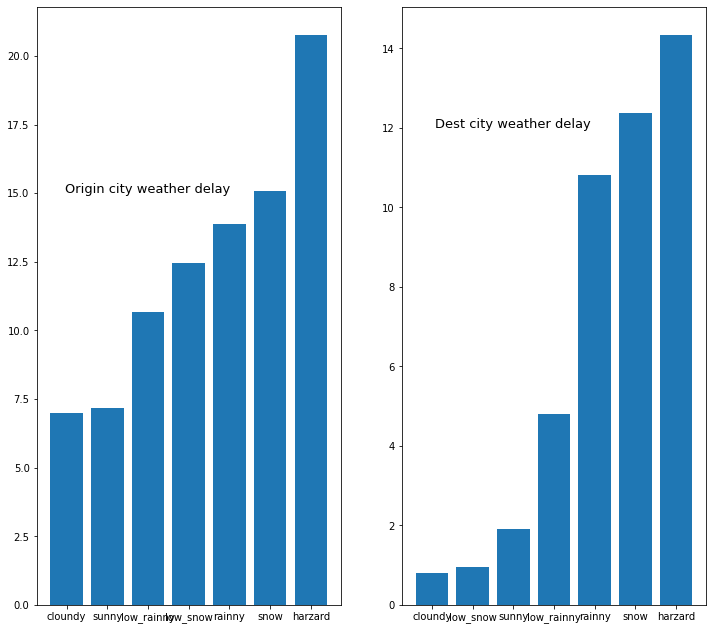

In [60]:
"""
plotting weather conditions vs avg delay 
"""

fig, ax = plt.subplots(1, 2, figsize=(12,11))

ax[0].bar(avg_origin_conditions['origin_city_condn'], avg_origin_conditions['dep_delay'])
ax[0].text(2, 15, 'Origin city weather delay', ha='center',fontsize=13)
#ax[0, 0].text("abc", 'xa', s='as')


ax[1].bar(avg_dest_conditions['dest_city_condn'], avg_dest_conditions['arr_delay'])
ax[1].text(2, 12, 'Dest city weather delay', ha='center',fontsize=13)
"""
As we can see the in the histogram, harzard, snow, rainny cause more delay than the others conditions
"""
plt.show()